## Understanding Seattle Airbnb Data

### Questions of Interest

1. What is the most popular month for rentals in Seattle?
2. What is the highest/lowest month for listing in Seattle?
3. What are the attributes associated with the price?

### Data 
Data can be found from [link](https://www.kaggle.com/airbnb/seattle/data).
The following Seattle Airbnb activity is included in this dataset:
- Listings, including full descriptions and average review score
- Reviews, including unique id for each reviewer and detailed comments
- Calendar, including listing id and the price and availability for that day

### Understanding the Data

In [1]:
#importinig libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [2]:
#import data
calendar = pd.read_csv('calendar.csv')
listing = pd.read_csv('listings.csv')
review = pd.read_csv('reviews.csv')

In [3]:
calendar.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
calendar.shape

(1393570, 4)

In [5]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [6]:
calendar[calendar['available'] == 'f']['price'].value_counts()

Series([], Name: price, dtype: int64)

In [7]:
listing.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [8]:
listing.shape

(3818, 92)

In [9]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [10]:
review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [11]:
review.shape

(84849, 6)

In [12]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


### Data Mining

For question 1, I use review to estimate the activity for each month.

In [13]:
# make date column to datetime data type
review['date'] = pd.to_datetime(review.date)

In [14]:
# get the month and year 
review['month'], review['year'] =review.date.dt.month, review.date.dt.year

In [15]:
# get the counts of review for each month
activity = review.groupby(['month', 'year'], as_index = False).count()
# rename the column to counts
activity.rename(columns = {'id':'counts'}, inplace = True)

In [16]:
# take a look at how the data is for each year
activity.year.value_counts()

2015    12
2014    12
2013    12
2012    12
2011    12
2010    12
2009     6
2016     1
Name: year, dtype: int64

Since 2016 and 2009 only have data for 1, 6 months, I will use the data from 2010 till 2015.

In [17]:
for i in [2009,2016]:
    activity.drop(activity[activity['year'] == i].index, inplace = True)
activity.year.value_counts()

2015    12
2014    12
2013    12
2012    12
2011    12
2010    12
Name: year, dtype: int64

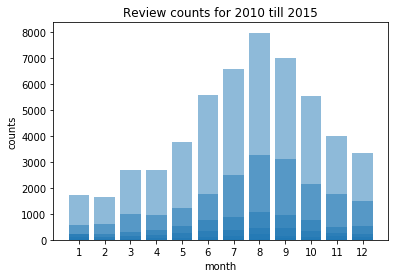

In [54]:
# plot the counts of review for each month from 2010 till 2015
activity = review.groupby(['month', 'year'], as_index = False).count().rename(columns = {'id':'counts'})
plt.bar(activity['month'], activity['counts'], alpha=.5)
plt.title('Review counts for 2010 till 2015')
plt.xlabel('month')
plt.ylabel('counts')
plt.xticks(np.arange(1,13), range(1,13));


Based on the plot, we can tell that August is the most popular month for aribnb in Seattle and followed by September then July.

For question 2, I use the mean price from calendar to see trend.

In [19]:
# drop Nan in price column
calendar.dropna(subset = ['price'], axis = 0, inplace = True)

In [20]:
def get_price(x):
    """
    Clean the price column by replacing '$' and ',' with ''.
    And convert the string into float.
    """
    try:
        x = x.replace('$','').replace(',','')
        return float(x)
    except:
        print ('Error')

In [21]:
# clean price
calendar.price = calendar.price.map(lambda x: get_price(x))
calendar.price

0          85.0
1          85.0
9          85.0
10         85.0
14         85.0
           ... 
1393207    87.0
1393208    87.0
1393211    87.0
1393212    87.0
1393213    87.0
Name: price, Length: 934542, dtype: float64

In [22]:
# get the month and year 
calendar['date'] = pd.to_datetime(calendar.date)
calendar['month'], calendar['year'] = calendar.date.dt.month, calendar.date.dt.year

In [23]:
# get mean price
price_mean = calendar.groupby(['month','year'], as_index = False).price.mean()
price_mean

,month,year,price
0,1,2016,121.568409
1,1,2017,136.882590
2,2,2016,124.293927
3,3,2016,128.644488
4,4,2016,135.097005
5,5,2016,139.538183
6,6,2016,147.473137
7,7,2016,152.094150
8,8,2016,150.656594
9,9,2016,143.255949


Since 2017 only has data for January, I will only use data from 2016.

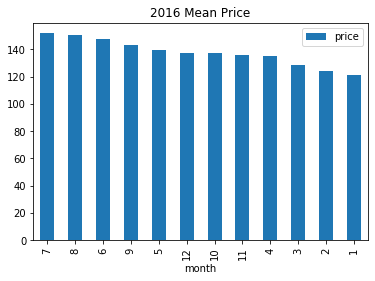

In [47]:
# plot mean price for 2016
price_mean.query('year == "2016"').sort_values(by = ['price'], ascending = False).plot(kind = 'bar', x = 'month', y = 'price')
plt.title('2016 Mean Price');

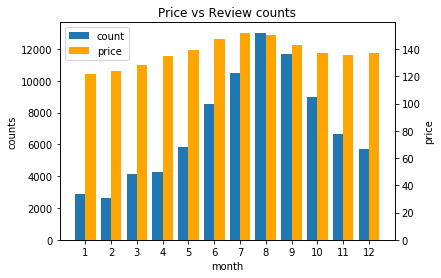

In [46]:
# plot mean price with activity
counts = review.groupby(['month'], as_index = False).count().rename(columns = {'id':'counts'})

fig, ax = plt.subplots()

price_2016 = price_mean.query('year == "2016"')
N = len(price_2016.index)

ax1 = ax.twinx()
ind = np.arange(N)
width = 0.4
p1 = ax.bar(ind - width/2, counts['counts'], width = width, label = 'count')
p2 = ax1.bar(ind + width/2, price_2016['price'],color = 'orange', width =  width, label = 'price')

p = [p1 ,p2]
labs = [f.get_label() for f in p]
ax.legend(p, labs, loc=2)

plt.xticks(np.arange(12), range(1,13))
ax.set_xlabel('month')
ax.set_ylabel('counts')
ax1.set_ylabel('price')
ax.set_title('Price vs Review counts');


I plot the counts of reviews from 2010 till 2015 with the 2016 mean price, and the result shows that July has the highest price for listing.

In [26]:
def clean(df):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    
    OUTPUT:
    df - a clean dataframe 
    
    This function will:
    1. Drop columns with 50% more missing the values
    2. Fill the mean of the column for any missing values 
    '''
    
    # drop the columns with 50% more missing data
    df.drop(columns = df.columns[df.isnull().mean() > 0.50], axis = 1, inplace= True)
    
    num_vars = df.select_dtypes(include=['int', 'float']).columns
    
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
    
    cat_vars = df.select_dtypes(include=['object']).columns
      
    return df

In [27]:
# clean the data
listing.price = listing.price.map(lambda x :  get_price(x))
clean_listing = clean(listing)
clean_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 88 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

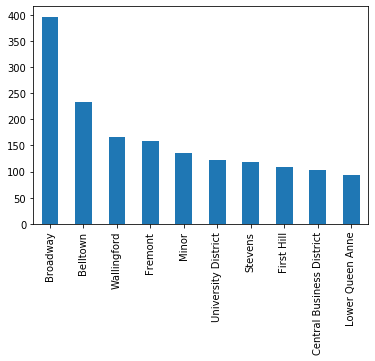

In [28]:
# plot for the most common neighbourhood
clean_listing.neighbourhood_cleansed.value_counts().head(10).plot(kind = 'bar');

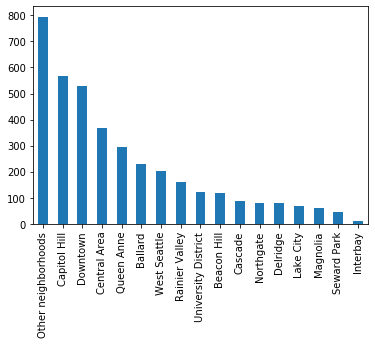

In [29]:
# plot for the neighbourhood group
clean_listing.neighbourhood_group_cleansed.value_counts().plot(kind = 'bar');

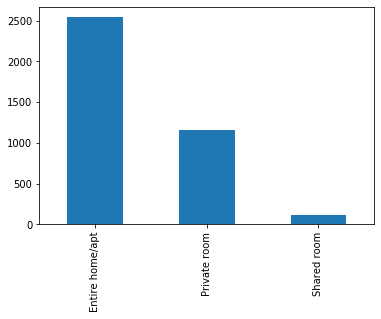

In [30]:
# numbers of listings for each host
clean_listing.room_type.value_counts().plot(kind='bar');

In [31]:
# list the wanted columns
wanted_list = ['neighbourhood_cleansed', 'room_type', 'accommodates', 'bed_type', 'number_of_reviews',
               'review_scores_rating', 'amenities', 'price']
wanted_list

['neighbourhood_cleansed',
 'room_type',
 'accommodates',
 'bed_type',
 'number_of_reviews',
 'review_scores_rating',
 'amenities',
 'price']

In [32]:
# create a new dataframe with the wanted variables
listing_v1=clean_listing[wanted_list]
listing_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  3818 non-null   object 
 1   room_type               3818 non-null   object 
 2   accommodates            3818 non-null   int64  
 3   bed_type                3818 non-null   object 
 4   number_of_reviews       3818 non-null   int64  
 5   review_scores_rating    3818 non-null   float64
 6   amenities               3818 non-null   object 
 7   price                   3818 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 238.8+ KB


In [33]:
# use the numbers of amenities to replace the original column
listing_v1.amenities = clean_listing.amenities.map(lambda x : len(x.strip('{}').split(",")))
listing_v1.amenities

D:\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0       10
1       16
2       21
3       14
4       13
        ..
3813    16
3814    17
3815    20
3816    11
3817    22
Name: amenities, Length: 3818, dtype: int64

In [34]:
def create_dummy(df, cols, dummy_na):
    '''
    INPUT:
    df - dataframe with categorical variables for creating dummy
    cols - list of the categorical columns
    dummy_na - whether create dummy NA vals of categorical columns
    
    OUTPUT:
    df - dataframe with dummy columns using (_) for separating and without the original columns
    
    Create dummy for each object columns
    '''
    for col in cols:
        try:
            if df[col].dtype == object:
                df_dummy = pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)
                df = pd.concat([df.drop(col, axis =1), df_dummy], axis = 1)
            else:
                continue
        except:
            continue
    return df

In [58]:
# create dummy with the function
listing_v2 = create_dummy(listing_v1, listing_v1.columns, False)

In [59]:
print (listing_v1.shape)
print (listing_v2.shape)

(3818, 8)
(3818, 97)


In [37]:
listing_v2.head()

,accommodates,number_of_reviews,review_scores_rating,amenities,price,neighbourhood_cleansed_Alki,neighbourhood_cleansed_Arbor Heights,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Bitter Lake,...,neighbourhood_cleansed_Westlake,neighbourhood_cleansed_Whittier Heights,neighbourhood_cleansed_Windermere,neighbourhood_cleansed_Yesler Terrace,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,4,207,95.000000,10,85.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4,43,96.000000,16,150.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,11,20,97.000000,21,975.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,0,94.539262,14,100.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,6,38,92.000000,13,450.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
def find_optimal_lm(df, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    df - pandas dataframe
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    
    y = df['price']
    X = df.drop(['price'], axis = 1)
    
    
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=0)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

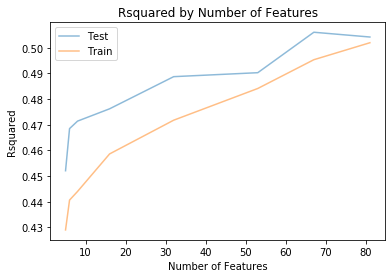

In [39]:
# find the optimal cutoffs for the dummy variables
cutoffs = [1500, 1000, 750, 500, 200, 100, 50, 20, 15, 10]
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm(listing_v2, cutoffs)

In [40]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    return coefs_df

In [55]:
# apply function
coef_df = coef_weights(lm_model.coef_, X_train)

# top 10 results
coef_df.sort_values('abs_coefs', ascending = False).head(15)

,est_int,coefs,abs_coefs
51,neighbourhood_cleansed_Southeast Magnolia,90.165356,90.165356
45,neighbourhood_cleansed_Pioneer Square,72.301417,72.301417
57,neighbourhood_cleansed_West Queen Anne,60.517648,60.517648
59,neighbourhood_cleansed_Westlake,57.595557,57.595557
53,neighbourhood_cleansed_Sunset Hill,55.630283,55.630283
63,room_type_Shared room,-48.804310,48.804310
44,neighbourhood_cleansed_Pike-Market,42.571406,42.571406
23,neighbourhood_cleansed_International District,40.441076,40.441076
52,neighbourhood_cleansed_Stevens,37.468761,37.468761
7,neighbourhood_cleansed_Broadview,-34.901101,34.901101


In [56]:
# top 10 variables for the negative coefs
coef_df.sort_values('coefs').head(15)

,est_int,coefs,abs_coefs
63,room_type_Shared room,-48.804310,48.804310
7,neighbourhood_cleansed_Broadview,-34.901101,34.901101
46,neighbourhood_cleansed_Rainier Beach,-27.418594,27.418594
31,neighbourhood_cleansed_Maple Leaf,-27.068743,27.068743
13,neighbourhood_cleansed_Dunlap,-24.108127,24.108127
40,neighbourhood_cleansed_North Delridge,-21.757503,21.757503
12,neighbourhood_cleansed_Crown Hill,-20.998874,20.998874
11,neighbourhood_cleansed_Columbia City,-20.227978,20.227978
33,neighbourhood_cleansed_Mid-Beacon Hill,-18.492772,18.492772
62,room_type_Private room,-17.422949,17.422949


In [57]:
# top 10 variables for the positive coefs
coef_df.sort_values('coefs', ascending= False).head(15)

,est_int,coefs,abs_coefs
51,neighbourhood_cleansed_Southeast Magnolia,90.165356,90.165356
45,neighbourhood_cleansed_Pioneer Square,72.301417,72.301417
57,neighbourhood_cleansed_West Queen Anne,60.517648,60.517648
59,neighbourhood_cleansed_Westlake,57.595557,57.595557
53,neighbourhood_cleansed_Sunset Hill,55.630283,55.630283
44,neighbourhood_cleansed_Pike-Market,42.571406,42.571406
23,neighbourhood_cleansed_International District,40.441076,40.441076
52,neighbourhood_cleansed_Stevens,37.468761,37.468761
48,neighbourhood_cleansed_Roosevelt,34.787820,34.787820
35,neighbourhood_cleansed_Montlake,30.273887,30.273887


### Summary

- Based on the finding above, we found out that the top 3 popular months for airbnb in Seattle are August, September then July, which indicates that late summer and early fall is the most popular season. 
- Also, July, August and June have the top 3 highest listing price, which meets the popular season.
- Using the linear model we built, listing price is mainly associated with the location and room type.